# 感知器(Perceptron)
<img src="image/perceptron.png" width="700">  

* 感知器學習的運作原理:  
  * `#`逐筆運算  
  1. 初始化隨機符合常態很小的權重  
  2. Net input function:樣本x與權重w內積再加上權重的常數項(偏誤單元)  
  3. Threshold function:將Net input 將壓縮(預測)成0和1  
  4. 計算預測值和實際值的誤差  
  5. Weight update:誤差和學習速率相乘並加回原本的權重以及偏誤單元 

# 實作感知器-Iris data-set

In [1]:
import numpy as np 

class  Perceptron(object):
    """Perceptron classifier #感知器
    Parameters
    ------------
    eta : float 學習速率 ( 0 ~ 1.0)
    n_iter : int 迭代次數
    random_state : int 初始化的隨機種子

    Attributes
    -----------
    w_ : 1d-array 配適過後的權重向量
    errors_ : list 儲存每輪的錯誤分類
    """
    def __init__(self,eta=0.01, n_iter = 50,random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self,X,y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          訓練用的向量,n_samples : 樣本數
          n_features : 特徵數.
        y : array-like, shape = [n_samples]
          目標變數.
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        #設定隨機種子
        #class裡面最好用 RandomState這種物件化來讓程式保持彈性                                                   
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        #亂數產生符合常態分布的隨機矩陣
        self.errors_ = []
        for _ in range(self.n_iter): #_是隨便一個不關心的變量(非約定俗成)
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update    #誤差項常數(偏誤單元)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    #np.dot 矩陣點積

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
 

In [2]:
import pandas as pd

#df = pd.read_csv('https://archive.ics.uci.edu/ml/'
#        'machine-learning-databases/iris/iris.data', header=None)
#df.to_csv('data/iris.csv',encoding = 'utf-8', index=False)
df = pd.read_csv('data/iris.csv')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


視覺化iris setosa & versicolor 兩個類別

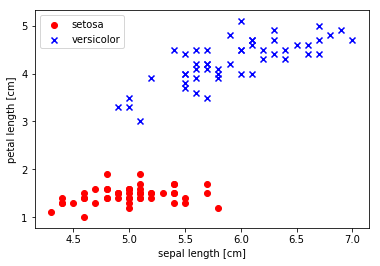

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

用剛剛寫的Perceptron分類iris並繪製每輪的error觀察收斂情況

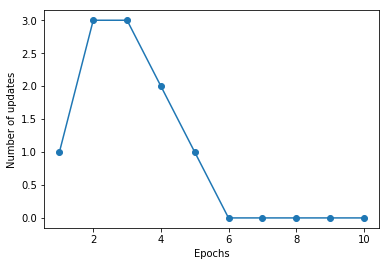

In [5]:
ppn = Perceptron(eta=0.01, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

編寫繪製決策邊界及其區域的函數plot_decision_regions()

In [8]:
from matplotlib.colors import ListedColormap

#A function for plotting decision regions
#畫出二維的決策區域
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    #畫出二維的決策區域
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #xx1,xx2 網格陣列(grid array)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #contourf()等高線圖(contour plot)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()) 
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    #畫出原樣本的類別
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

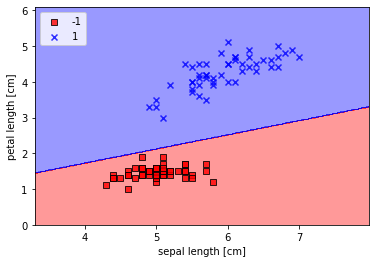

In [9]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()